# Time Series models

In [1]:
# Importing all libraries required for the notebook at the start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [2]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# Load data
path = "../data/zillow_datasets/City_time_series_sorted.csv"   # adjust path if needed

df = pd.read_csv(path)

# Basic info
print("Dataset shape:", df.shape)

# Peek at the data
display(df.head())


Dataset shape: (3762566, 81)


,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,2010-01-31,abbevilleabbevillesc,56.000,51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28,abbevilleabbevillesc,56.000,54.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,abbevilleabbevillesc,56.000,57.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30,abbevilleabbevillesc,56.000,54.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31,abbevilleabbevillesc,55.000,56.000,NaN,NaN,NaN,N

In [3]:

# Check data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762566 entries, 0 to 3762565
Data columns (total 81 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   Date                                                           object 
 1   RegionName                                                     object 
 2   InventorySeasonallyAdjusted_AllHomes                           float64
 3   InventoryRaw_AllHomes                                          float64
 4   MedianListingPricePerSqft_1Bedroom                             float64
 5   MedianListingPricePerSqft_2Bedroom                             float64
 6   MedianListingPricePerSqft_3Bedroom                             float64
 7   MedianListingPricePerSqft_4Bedroom                             float64
 8   MedianListingPricePerSqft_5BedroomOrMore                       float64
 9   MedianListingPricePerSqft_AllHomes            

In [4]:

# Summary statistics for numerical columns
display(df.describe())

,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
count,771744.000,771744.000,7670.000,74574.000,250633.000,144183.000,37653.000,551975.000,54821.000,7584.000,531430.000,6494.000,57737.000,209261.000,120248.000,28763.000,431910.000,41133.000,8179.000,420125.000,283536.000,20328.000,261008.000,283536.000,20328.000,261008.000,15356.000,31229.000,34867.000,9894.000,1168.000,75400.000,15828.000,5604.000,43060.000,62180.000,16874.000,17152.000,33151.000,35989.000,10141.000,1126.000,70495.000,14944.000,9306.000,50233.000,59054.000,17713.000,2953445.000,2354407.000,2354407.000,201.000,201.000,359920.000,31504.000,332640.000,359920.000,31504.000,332640.000,1082875.000,733322.000,711641.000,147290.000,321975.000,1764608.000,2540635.000,1947880.000,825325.000,3083390.000,2599397.000,823574.000,3077548.000,3075331.000,3115759.000,1098167.000,1100850.000,1009397.000,450219.000,1098919.000
mean,163.438,163.469,260.912,167.764,145.077,154.369,193.162,151.277,207.500,102.726,149.430,213953.818,211238.145,243878.209,390295.005,684844.797,274226.497,259901.429,220657.105,287631.631,4.044,4.497,4.010,9558.706,9641.561,9666.941,1.731,1.365,1.089,0.993,1.782,1.133,1.568,1.400,1.439,1.037,1.104,1244.572,1398.504,1622.479,2032.365,2555.750,1605.739,1647.865,1269.382,1341.103,1633.251,1388.893,116.303,35.585,56.795,88.114,11.886,13.014,11.250,13.249,12.996,11.232,13.230,10.896,30.006,31.473,288751.940,144497.034,149844.910,188476.618,271100.058,450647.377,189616.501,144535.110,182679.754,189849.795,196739.824,280208.291,1402.930,1391.671,0.911,1322

In [6]:
# Convert to datetime
df['date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('date')

In [7]:
print(df['date'].min(), df['date'].max())
print(df['date'].diff().value_counts().head(10))

1996-04-30 00:00:00 2017-12-31 00:00:00
date
0 days     3762305
31 days        152
30 days         87
28 days         16
29 days          5
Name: count, dtype: int64


In [8]:
# Count missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_summary = pd.DataFrame({"Missing Count": missing, "Missing %": missing_percent})
for col in missing_summary.columns:
    print(missing_summary[col])


PctOfHomesSellingForGain_AllHomes          3762365
PctOfHomesSellingForLoss_AllHomes          3762365
MedianRentalPrice_5BedroomOrMore           3761440
MedianRentalPricePerSqft_5BedroomOrMore    3761398
MedianRentalPricePerSqft_DuplexTriplex     3756962
                                            ...   
ZHVI_AllHomes                               679176
ZHVI_TopTier                                646807
RegionName                                       0
Date                                             0
date                                             0
Name: Missing Count, Length: 82, dtype: int64
PctOfHomesSellingForGain_AllHomes         99.995
PctOfHomesSellingForLoss_AllHomes         99.995
MedianRentalPrice_5BedroomOrMore          99.970
MedianRentalPricePerSqft_5BedroomOrMore   99.969
MedianRentalPricePerSqft_DuplexTriplex    99.851
                                           ...  
ZHVI_AllHomes                             18.051
ZHVI_TopTier                              17.191
R

In [3]:
# Drop useless cols
threshold = 0.8  # drop cols with >80% missing
df = df.loc[:, df.isnull().mean() < threshold]

In [4]:
df.columns

Index(['Date', 'RegionName', 'InventorySeasonallyAdjusted_AllHomes',
       'InventoryRaw_AllHomes', 'ZHVIPerSqft_AllHomes',
       'PctOfHomesDecreasingInValues_AllHomes',
       'PctOfHomesIncreasingInValues_AllHomes', 'PriceToRentRatio_AllHomes',
       'ZHVI_2bedroom', 'ZHVI_3bedroom', 'ZHVI_4bedroom',
       'ZHVI_5BedroomOrMore', 'ZHVI_AllHomes', 'ZHVI_BottomTier',
       'ZHVI_CondoCoop', 'ZHVI_MiddleTier', 'ZHVI_SingleFamilyResidence',
       'ZHVI_TopTier', 'ZRI_AllHomes', 'ZRI_AllHomesPlusMultifamily',
       'ZriPerSqft_AllHomes', 'Zri_SingleFamilyResidenceRental'],
      dtype='object')

In [15]:
'''
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Set up grid size (2 columns per row)
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[1:-1]):  # Exclude ID and target variable
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color="steelblue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove empty subplots if present
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
'''

'\nnumeric_cols = df.select_dtypes(include=[np.number]).columns\n\n# Set up grid size (2 columns per row)\nn_cols = 2\nn_rows = int(np.ceil(len(numeric_cols) / n_cols))\n\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))\naxes = axes.flatten()\n\nfor i, col in enumerate(numeric_cols[1:-1]):  # Exclude ID and target variable\n    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color="steelblue")\n    axes[i].set_title(f"{col} Distribution")\n    axes[i].set_xlabel(col)\n    axes[i].set_ylabel("Count")\n\n# Remove empty subplots if present\nfor j in range(i+1, len(axes)):\n    fig.delaxes(axes[j])\n\nplt.tight_layout()\nplt.show()\n'

In [16]:
# Correlation heatmap

# df_numeric = df_[numeric_cols]
# plt.figure(figsize=(12, 10))
# corr = df_numeric.corr()
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
# plt.title("Correlation Heatmap")


In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# plt.figure(figsize=(10,6))
# sns.boxplot(data=df_numeric.iloc[:100, :10])
# plt.show()


### Data Cleaning

In [11]:
# ============================================
# Handling Duplicates
# ============================================

# Check for duplicates
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# If any duplicates exist, inspect them
if duplicate_rows.sum() > 0:
    display(df[duplicate_rows].head())

# Drop duplicate rows
df = df.drop_duplicates().reset_index(drop=True)
print(f"Shape after removing duplicates: {df.shape}")

# Optional: transpose if needed for specific analysis, but do not overwrite
# df_T = df.transpose()


Number of duplicate rows: 0
Shape after removing duplicates: (3762566, 23)


In [5]:
# Numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('ZHVI_AllHomes')  # keep target separate

# Step 1: region-wise interpolation
for col in numeric_cols:
    df[col] = df.groupby('RegionName')[col].transform(
        lambda g: g.interpolate(method='linear', limit_direction='both')
    )

# Step 2: Fill remaining NaNs with column median (or mean) across dataset
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Step 3: Categorical features
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check
print(df.isnull().sum())


Date                                          0
RegionName                                    0
InventorySeasonallyAdjusted_AllHomes          0
InventoryRaw_AllHomes                         0
ZHVIPerSqft_AllHomes                          0
PctOfHomesDecreasingInValues_AllHomes         0
PctOfHomesIncreasingInValues_AllHomes         0
PriceToRentRatio_AllHomes                     0
ZHVI_2bedroom                                 0
ZHVI_3bedroom                                 0
ZHVI_4bedroom                                 0
ZHVI_5BedroomOrMore                           0
ZHVI_AllHomes                            679176
ZHVI_BottomTier                               0
ZHVI_CondoCoop                                0
ZHVI_MiddleTier                               0
ZHVI_SingleFamilyResidence                    0
ZHVI_TopTier                                  0
ZRI_AllHomes                                  0
ZRI_AllHomesPlusMultifamily                   0
ZriPerSqft_AllHomes                     

In [7]:
import pandas as pd

# Load your cleaned dataset
data = df.copy()

# Ensure Date is datetime
data["Date"] = pd.to_datetime(data["Date"])

# Keep only the required columns (order preserved)
data = data[["Date", "RegionName", "ZHVI_AllHomes"]]

# Sort properly for modeling/forecasting
data = data.sort_values(by=["RegionName", "Date"])

# Save final filtered dataset
data.to_csv("cleaned_zillow_dataset.csv", index=False)

print("Saved cleaned_zillow_dataset.csv successfully!")


Saved cleaned_zillow_dataset.csv successfully!


In [20]:
df.head()

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PriceToRentRatio_AllHomes,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_SingleFamilyResidenceRental,date
0,1996-04-30,abbottstownadamspa,72.000,72.000,93.000,29.650,60.110,10.500,118800.000,146100.000,213100.000,324200.000,142500.000,110900.000,147100.000,142600.000,144400.000,108700.000,1227.000,1222.000,0.832,1231.000,1996-04-30
1,1996-04-30,perryvillececilmd,72.000,72.000,70.000,29.650,60.110,10.500,118800.000,93200.000,213100.000,324200.000,106700.000,76900.000,147100.000,106700.000,108800.000,156400.000,1227.000,1222.000,0.832,1231.000,1996-04-30
2,1996-04-30,perth_amboymiddlesexnj,72.000,72.000,71.000,29.650,60.110,10.500,90600.000,103900.000,115100.000,136600.000,113700.000,91500.000,102900.000,113700.000,113700.000,144000.000,1227.000,1222.000,0.832,1231.000,1996-04-30
3,1996-04-30,perthfultonny,72.000,72.000,52.000,29.650,60.110,10.500,62100.000,78200.000,95800.000,324200.000,76600.000,110900.000,147100.000,76600.000,76600.000,206800.000,1227.000,1222.000,0.832,1231.000,1996-04-30
4,1996-04-30,perula_salleil,72.000,72.000,88.000,29.650,60.110,10.500,118800.000,146100.000,213100.000,324200.000,114900.000,91500.000,147100.000,114900.000,114500.000,171000.000,1227.000,1222.000,0.832,1231.000,1996-04-30


### Feature Engineering

In [21]:
# Separate categorical and numeric features
categorical_cols = df.select_dtypes(include=["object"]).columns
numeric_cols = df.select_dtypes(exclude=["object"]).columns

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))
print(categorical_cols)

Numeric columns: 21
Categorical columns: 2
Index(['Date', 'RegionName'], dtype='object')


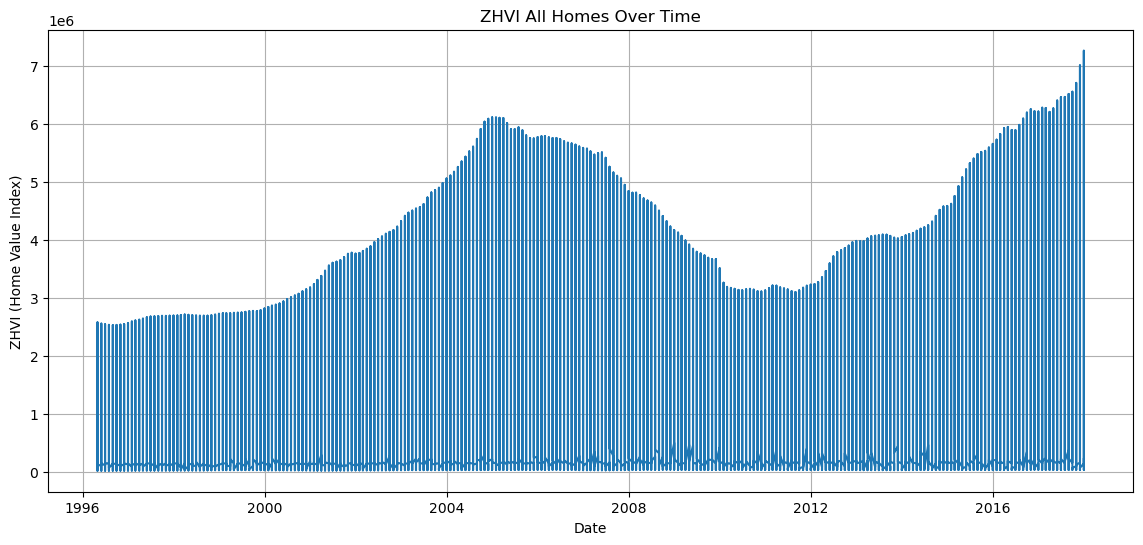

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['ZHVI_AllHomes'])
plt.title('ZHVI All Homes Over Time')
plt.xlabel('Date')
plt.ylabel('ZHVI (Home Value Index)')
plt.grid()
plt.show()


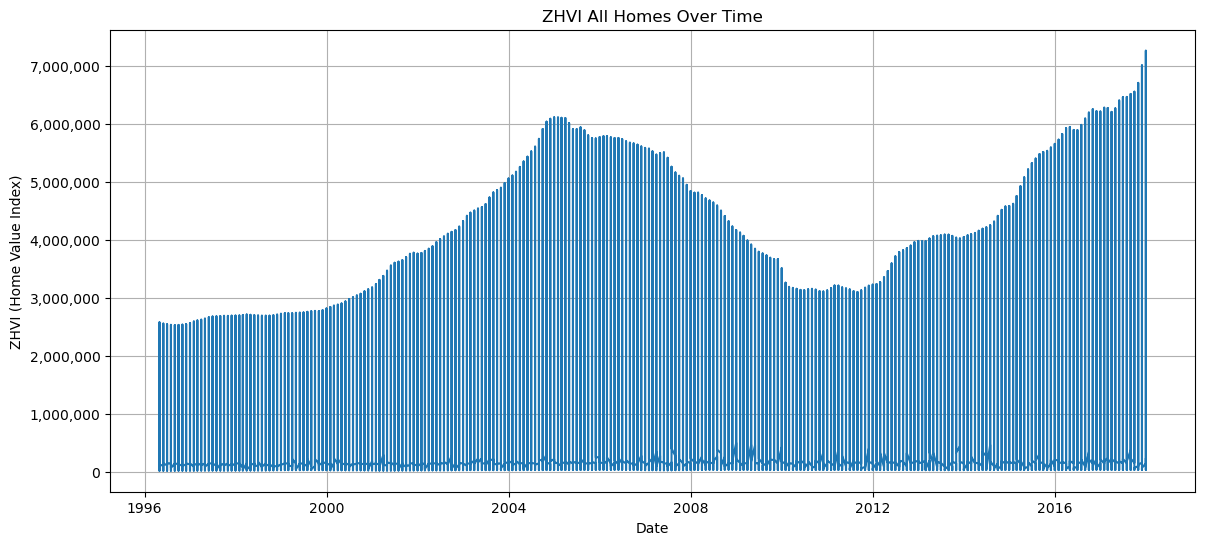

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['ZHVI_AllHomes'])
plt.title('ZHVI All Homes Over Time')
plt.xlabel('Date')
plt.ylabel('ZHVI (Home Value Index)')
plt.grid(True)

# Format y-axis numbers with commas
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


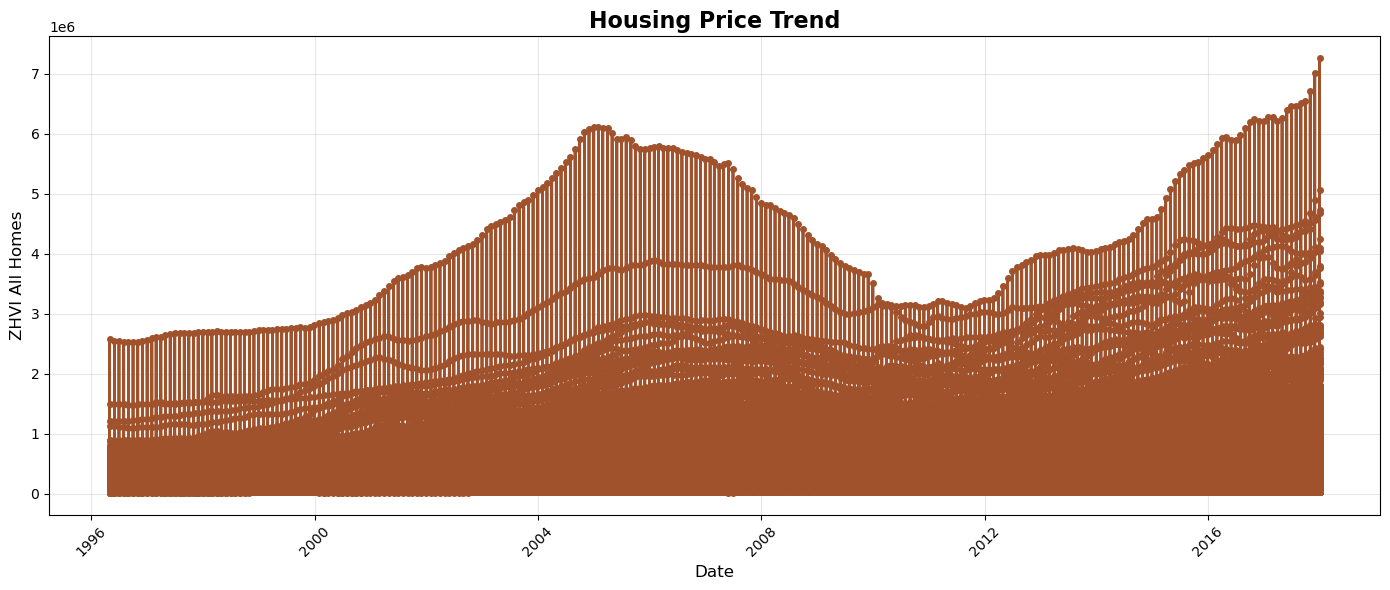

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: make sure Date is datetime and data sorted
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(14,6))

# ✅ Only line + optional marker
plt.plot(df['Date'], df['ZHVI_AllHomes'],
         color='#A0522D',    # line color
         linestyle='-',      # solid line
         marker='o',         # optional, remove if you want just line
         markersize=4,
         linewidth=2)

# Labels and style
plt.title('Housing Price Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('ZHVI All Homes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure your Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year
df['Year'] = df['Date'].dt.year

# Group by year and calculate mean (or median)
yearly = df.groupby('Year')['ZHVI_AllHomes'].mean().reset_index()


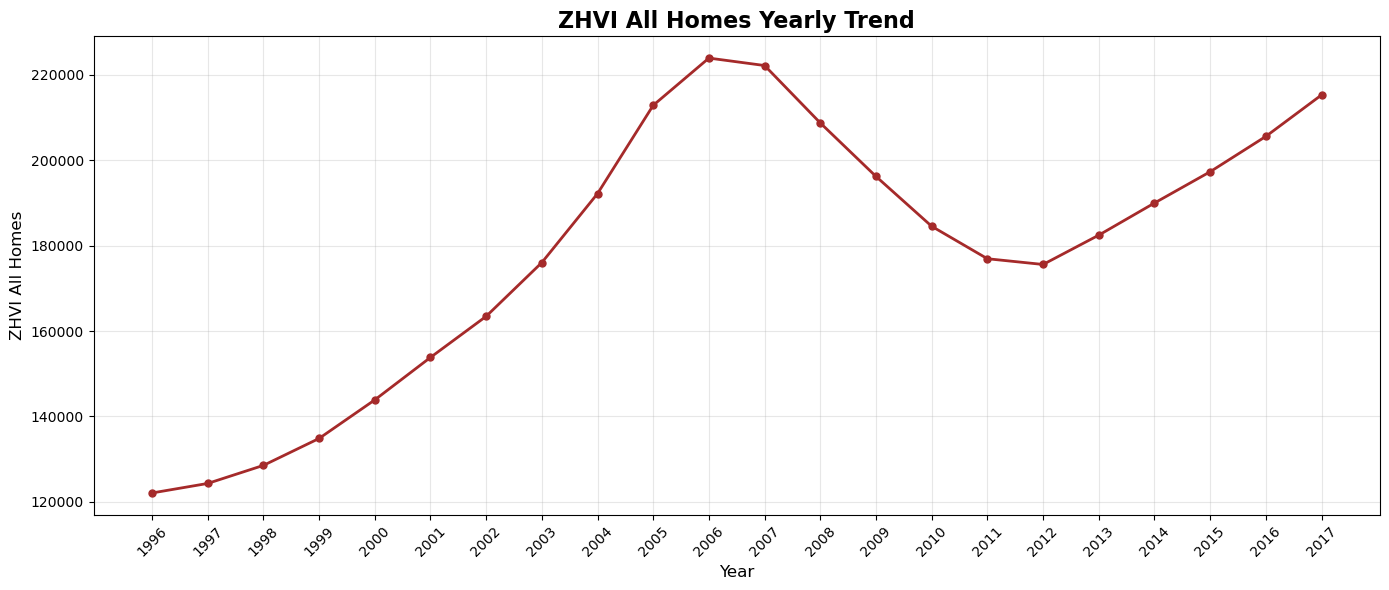

In [26]:
plt.figure(figsize=(14,6))
plt.plot(yearly['Year'], yearly['ZHVI_AllHomes'],
         color='brown', linewidth=2, marker='o', markersize=5)

plt.title('ZHVI All Homes Yearly Trend', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('ZHVI All Homes', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(yearly['Year'], rotation=45)  # show each year clearly
plt.tight_layout()
plt.show()


In [27]:
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly = df.groupby('YearMonth')['ZHVI_AllHomes'].mean().reset_index()
monthly['YearMonth'] = monthly['YearMonth'].astype(str)


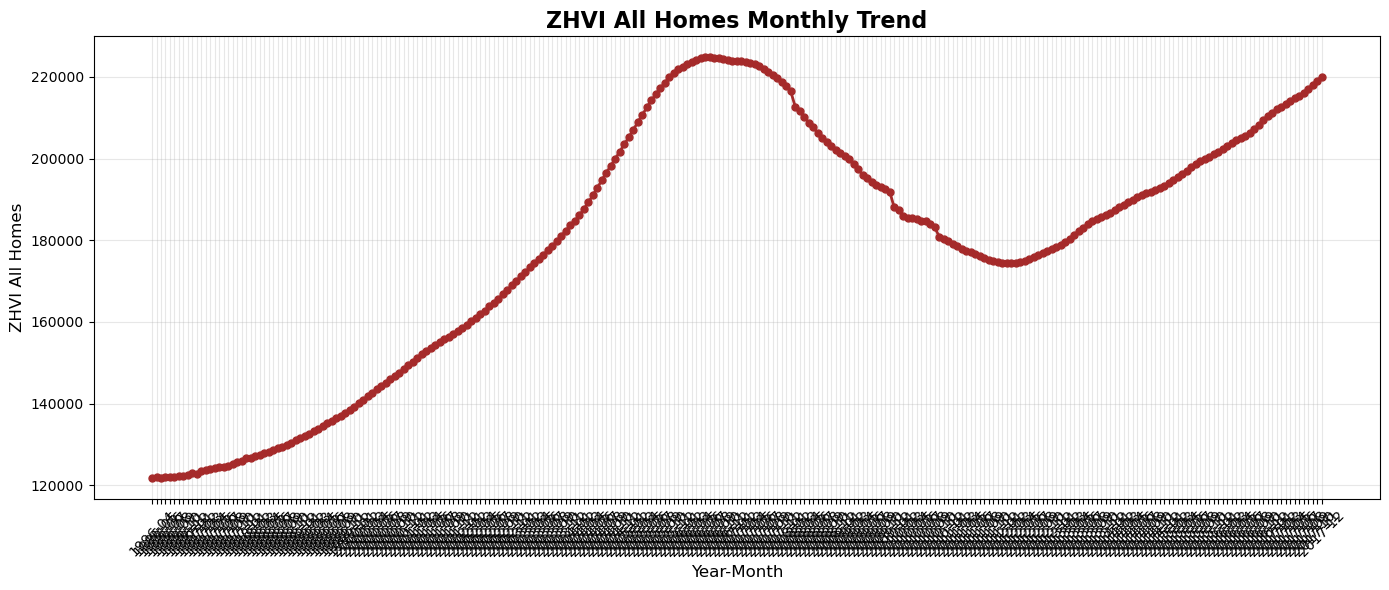

In [28]:
plt.figure(figsize=(14,6))
plt.plot(monthly['YearMonth'], monthly['ZHVI_AllHomes'],
         color='brown', linewidth=2, marker='o', markersize=5)

plt.title('ZHVI All Homes Monthly Trend', fontsize=16, fontweight='bold')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('ZHVI All Homes', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)  # show each month clearly
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Use only target column for LSTM
target_column = 'ZHVI_AllHomes'  # replace with your target column name
data = df[[target_column]].values

# Scale data to 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 30  # use past 30 days to predict next
X, y = create_sequences(data_scaled, seq_length)

# Reshape X for LSTM: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [30]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential()
model.add(LSTM(10, activation='tanh', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)


In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'][seq_length + train_size:], y_test_actual, label='Actual')
plt.plot(df['Date'][seq_length + train_size:], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('ZHVI All Homes')
plt.title('Zillow Price Trend Prediction using LSTM')
plt.legend()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model
import joblib

In [5]:

# ============================================
# 1. LOAD DATA AND MODEL
# ============================================
df = pd.read_csv("../data/zillow_datasets/City_time_series.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['RegionName', 'Date'])

# Encode region IDs
df['region_id'] = df['RegionName'].astype('category').cat.codes
region_count = df['region_id'].nunique()


In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model

custom_objects = {
    'mse': tf.keras.losses.MeanSquaredError,
    'mae': tf.keras.losses.MeanAbsoluteError
}

model = load_model("../models/lstm_region_price_model.h5", custom_objects=custom_objects)

scalers = joblib.load("../models/price_scalers.pkl")

target_col = "ZHVI_AllHomes"
SEQ_LEN = 30


d:\Miniconda\envs\zillow_realtyai\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:

# ============================================
# 2. RESCALE PRICE USING LOADED SCALERS
# ============================================
df['scaled_price'] = 0.0
for region_id in df['region_id'].unique():
    if region_id in scalers:
        scaler = scalers[region_id]
        mask = df['region_id'] == region_id
        df.loc[mask, 'scaled_price'] = scaler.transform(
            df.loc[mask, target_col].values.reshape(-1, 1)
        ).flatten()

In [9]:

# ============================================
# 3. SELECT 200 UNIQUE REGIONS
# ============================================
unique_regions = df['region_id'].unique()
selected_regions = unique_regions[:200] if len(unique_regions) >= 200 else unique_regions

# Filter the dataframe for these regions only
df_filtered = df[df['region_id'].isin(selected_regions)]


In [10]:

# ============================================
# 4. CREATE TEST SEQUENCES FOR SELECTED REGIONS
# ============================================
def create_sequences_region(df, seq_length=SEQ_LEN):
    X_seq, X_region, y_seq, meta_rows = [], [], [], []
    for region_id in df['region_id'].unique():
        region_data = df[df['region_id'] == region_id].sort_values('Date')
        prices = region_data['scaled_price'].values
        if len(prices) <= seq_length:
            continue
        for i in range(seq_length, len(prices)):
            X_seq.append(prices[i-seq_length:i])
            X_region.append(region_id)
            y_seq.append(prices[i])
            meta_rows.append(region_data.iloc[i])
    return np.array(X_seq), np.array(X_region), np.array(y_seq), pd.DataFrame(meta_rows)

X_seq, X_region, y, meta_df = create_sequences_region(df_filtered, seq_length=SEQ_LEN)
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

In [11]:

# ============================================
# 5. PREDICT AND INVERSE SCALE
# ============================================
y_pred_scaled = model.predict([X_seq, X_region], verbose=0)
y_pred_actual = []
y_true_actual = []

for i in range(len(y)):
    region_id = X_region[i]
    scaler = scalers[region_id]
    y_pred_actual.append(scaler.inverse_transform(y_pred_scaled[i].reshape(-1, 1))[0, 0])
    y_true_actual.append(scaler.inverse_transform(y[i].reshape(-1, 1))[0, 0])

y_pred_actual = np.array(y_pred_actual)
y_true_actual = np.array(y_true_actual)


In [13]:
import numpy as np

# Convert to numpy arrays
y_pred_actual = np.array(y_pred_actual)
y_true_actual = np.array(y_true_actual)

# Filter out NaNs
mask = ~np.isnan(y_true_actual) & ~np.isnan(y_pred_actual)
y_true_actual = y_true_actual[mask]
y_pred_actual = y_pred_actual[mask]

# Now calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true_actual, y_pred_actual)
rmse = mean_squared_error(y_true_actual, y_pred_actual) ** 0.5
mape = np.mean(np.abs((y_true_actual - y_pred_actual) / y_true_actual)) * 100
r2 = r2_score(y_true_actual, y_pred_actual)


In [ ]:
results_rows = []

for i in range(len(y_pred_scaled)):
    region_id = X_region[i]
    scaler = scalers[region_id]

    # Inverse transform
    y_pred_val = scaler.inverse_transform(y_pred_scaled[i].reshape(-1, 1))[0, 0]
    y_true_val = scaler.inverse_transform(y[i].reshape(-1, 1))[0, 0]

    # Skip if NaN
    if np.isnan(y_pred_val) or np.isnan(y_true_val):
        continue

    row = meta_df.iloc[i].copy()
    row['ActualPrice'] = y_true_val
    row['PredictedPrice'] = y_pred_val
    row['Error'] = y_true_val - y_pred_val
    results_rows.append(row)

# Create DataFrame
results_df = pd.DataFrame(results_rows)

# Optional column ordering
cols = ['Date', 'RegionName', 'region_id', target_col, 'ActualPrice', 'PredictedPrice', 'Error']
results_df = results_df[cols]

results_df.to_csv("lstm_test.csv", index=False)
print("📁 Saved: lstm_test.csv")


📁 Saved: lstm_test_200_unique_regions_clean.csv


In [21]:
import pandas as pd

# Load the cleaned CSV
df = pd.read_csv("lstm_test.csv")

# Select 10 unique regions
unique_regions = df['region_id'].unique()[:10]

# Pick the first row of each of these 10 regions
sample_df = df[df['region_id'].isin(unique_regions)].groupby('region_id').first().reset_index()

# Show the 10 rows
sample_df


,region_id,Date,RegionName,ZHVI_AllHomes,ActualPrice,PredictedPrice,Error
0,2,8/31/1999,abbevillelafayettems,83000,83000,80131.76563,2868.234375
1,4,10/31/1998,abbottstownadamspa,94700,94700,90345.37500,4354.625000
2,7,2/29/2000,aberdeengrays_harborwa,74100,74100,74089.58594,10.414062
3,8,10/31/1998,aberdeenharfordmd,111600,111600,110558.92970,1041.070313
4,10,2/28/2001,aberdeenmoorenc,98800,98800,101675.30470,-2875.304688
5,12,7/31/2012,abilenedickinsonks,96200,96200,92548.54688,3651.453125
6,14,10/31/1998,abingdonharfordmd,126200,126200,125849.93750,350.062500
7,16,10/31/1998,abingdonwashingtonva,95700,95700,95465.06250,234.937500
8,17,8/31/1999,abington_townshiplackawannapa,224300,224300,225683.32810,-1383.328125
9,18,10/31/1998,abingtonmontgomerypa,131800,131800,131143.76560,656.234375


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate errors
df = pd.read_csv("lstm_test.csv")

# Select 20 unique regions
unique_regions = df['region_id'].unique()[:20]

# Pick the first row of each of these 20 regions
df = df[df['region_id'].isin(unique_regions)].groupby('region_id').first().reset_index()

# Show the 20 rows 
df['Error'] = df['ActualPrice'] - df['PredictedPrice']
df['APE'] = np.abs(df['Error']) / df['ActualPrice'] * 100  # Absolute Percentage Error

# Compute overall metrics
mape = df['APE'].mean()
accuracy = 100 - mape
print(f"MAPE: {mape:.2f}%, Accuracy: {accuracy:.2f}%")


MAPE: 4.31%, Accuracy: 95.69%


In [1]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================================
# CONFIGURATION
# ============================================
MODEL_PATH = "../models/lstm_region_price_model.h5"      # ← your saved model path
SCALERS_PATH = "../models/price_scalers.pkl"      # ← saved dict of scalers
DATA_PATH = "../data/zillow_datasets/City_time_series_sorted.csv"         # ← dataset you used for training
SEQ_LEN = 30

# ============================================
# 1. LOAD DATA
# ============================================
df = pd.read_csv(DATA_PATH)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['RegionName', 'Date'])
df['region_id'] = df['RegionName'].astype('category').cat.codes

# Load the number of regions
region_count = df['region_id'].nunique()


In [2]:

# ============================================
# 2. LOAD MODEL AND SCALERS
# ============================================
model = load_model(MODEL_PATH,compile=False)
scalers = joblib.load(SCALERS_PATH)

print(f"✅ Model and scalers loaded successfully.")
print(f"Total Regions: {region_count}")


d:\Miniconda\envs\zillow_realtyai\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


✅ Model and scalers loaded successfully.
Total Regions: 16636


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def plot_actual_vs_predicted(region_name):
    import matplotlib.dates as mdates

    if region_name not in df['RegionName'].values:
        print(f"Region '{region_name}' not found in dataset.")
        return

    region_id = df[df['RegionName'] == region_name]['region_id'].iloc[0]
    region_data = df[df['region_id'] == region_id].sort_values('Date')
    scaler = scalers.get(region_id)
    
    region_data = df[df['region_id'] == region_id].sort_values('Date')
    region_data = region_data.dropna(subset=['ZHVI_AllHomes'])  # remove NaNs

    if len(region_data) <= SEQ_LEN:
        print(f"Region '{region_name}' skipped — too few valid points.")
        return

    # Original prices
    prices = region_data['ZHVI_AllHomes'].values.reshape(-1, 1)
    scaled_prices = scaler.transform(prices).flatten()


    if scaler is None:
        print(f"No scaler found for region '{region_name}'")
        return

    # Original prices
    prices = region_data['ZHVI_AllHomes'].values.reshape(-1, 1)
    scaled_prices = scaler.transform(prices).flatten()

    # Create sequences
    X_seq, y_true = [], []
    for i in range(SEQ_LEN, len(scaled_prices)):
        X_seq.append(scaled_prices[i-SEQ_LEN:i])
        y_true.append(scaled_prices[i])

    if len(X_seq) == 0:
        print(f"Region '{region_name}' has too few data points.")
        return

    X_seq = np.array(X_seq).reshape(-1, SEQ_LEN, 1)
    region_input = np.full((len(X_seq), 1), region_id)

    # Predict
    y_pred_scaled = model.predict([X_seq, region_input], verbose=0).flatten()

    # Inverse transform
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
    y_true = scaler.inverse_transform(np.array(y_true).reshape(-1,1)).flatten()

    # Dates
    dates = region_data['Date'].iloc[SEQ_LEN:]

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape

    print(f"\n📍 Region: {region_name}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.3f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"Accuracy (100-MAPE): {accuracy:.2f}%")

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(dates, y_true, label='Actual Price', linewidth=2)
    plt.plot(dates, y_pred, label='Predicted Price', linestyle='--', color='red')
    plt.title(f"Actual vs Predicted Prices — {region_name}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.gcf().autofmt_xdate()  # rotate dates nicely
    plt.legend()
    plt.tight_layout()
    plt.show()



📍 Region: abbevillelafayettems
MAE: 897.10
RMSE: 1154.47
R²: 0.992
MAPE: 0.78%
Accuracy (100-MAPE): 99.22%


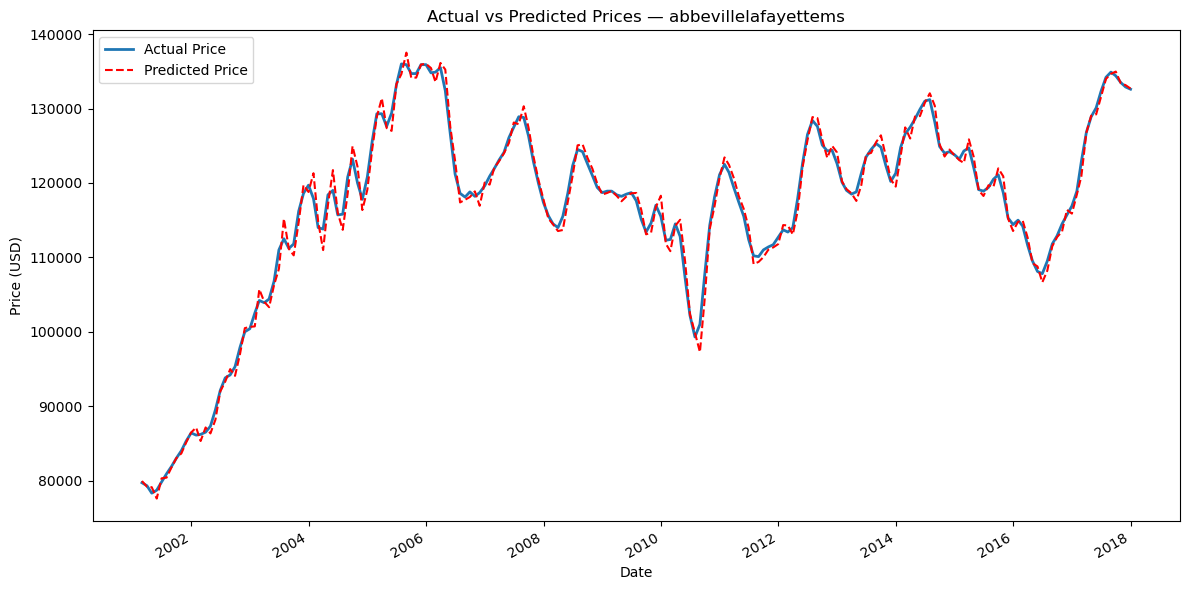

In [ ]:

# regions = ['abbevilleabbevillesc', 'abbevillehenryal', 'abbevillelafayettems']
# for region in regions:
#     plot_actual_vs_predicted(region)
plot_actual_vs_predicted('abbevillelafayettems')

## this should be next to the accuracy of lstm_test.csv of 20 regions

In [ ]:

# Visualization
fig, ax1 = plt.subplots(figsize=(12,6))

# Dollar error bar chart
ax1.bar(df['RegionName'], df['Error'], color='skyblue', label='Dollar Error ($)')
ax1.set_ylabel('Dollar Error ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right')

# Percentage error line chart
ax2 = ax1.twinx()
ax2.plot(df['RegionName'], df['APE'], color='red', marker='o', label='Percentage Error (%)')
ax2.set_ylabel('Percentage Error (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and legends
plt.title('Dollar vs Percentage Error for Regions')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
